# Introduction to Time Series Analysis

Time series analysis is a family of techniques used to analyze data that is collected over time. 
- In time series analysis, data is collected at equally spaced intervals, such as hourly, daily, weekly, or monthly intervals. 
- The goal of time series analysis is to identify patterns or trends in the data, and use these patterns to make predictions about future values.

In [1]:
import pandas as pd
df = pd.read_csv('data/monthly_milk_production.csv',index_col='Date', parse_dates=True)
df.index.freq = "MS"
df.head(5)

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Figure size 1000x600 with 0 Axes>

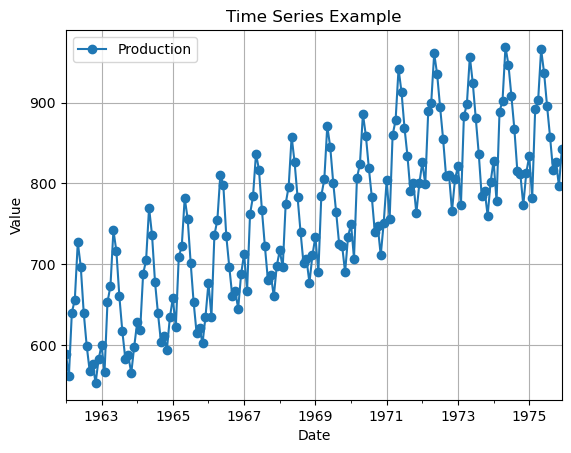

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.plot(marker='o')
plt.title('Time Series Example')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Time series analysis is used in many different fields, including finance, economics, engineering, and environmental science. 


- Finance: Predict stock prices or other financial indicators. 

- Economics: Trends in economic indicators such as inflation, gross domestic product, or unemployment rates. 

- Engineering: Monitor performance of machines or systems over time. Identify patterns in the vibrations of an engine, which could indicate a potential failure.

- Environmental science: Study trends in environmental factors such as temperature, rainfall, or air pollution levels. Decompose a time series of global temperature into its component frequency components, in order to identify long-term trends and cyclical patterns.

- Marketing: Forecast sales or customer behavior over time. Predict future sales of a product based on its past sales history so you have enough items on the stock.

## Time serie decomposition

Time series decomposition is a statistical technique that breaks down a time series into its constituent components. The primary goal of decomposition is to understand and analyze the underlying patterns in the time series data. The three main components usually are:
- Trend: The long-term movement or general direction in the data. 
- Seasonality: The repetitive, periodic fluctuations in the data that occur at regular intervals. 
- Residual (or Error): The random noise or irregular component that remains after removing the trend and seasonality. 

<Axes: xlabel='Date'>

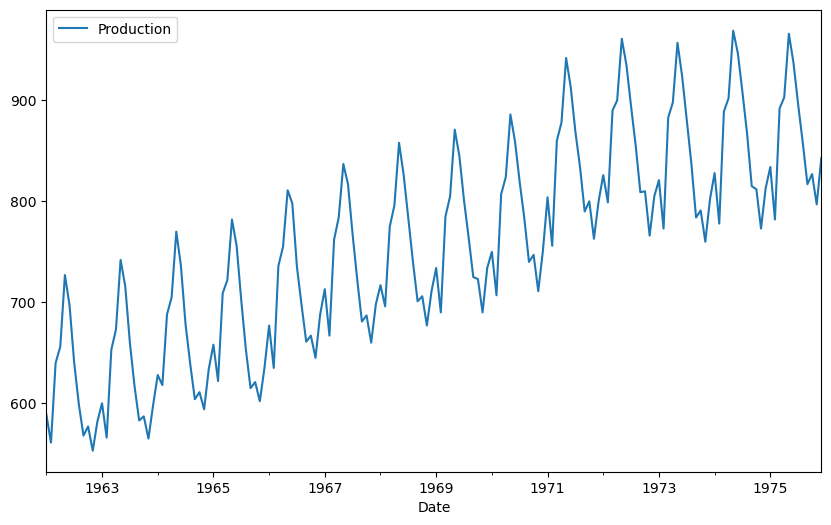

In [3]:
df.plot(figsize=(10,6))

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

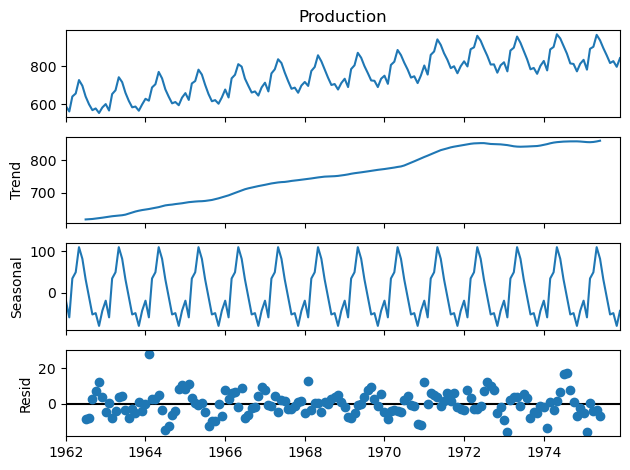

In [5]:
results = seasonal_decompose(df['Production'])
results.plot();

In [6]:
trend = results.trend
seasonal = results.seasonal
residual = results.resid

<Axes: xlabel='Date'>

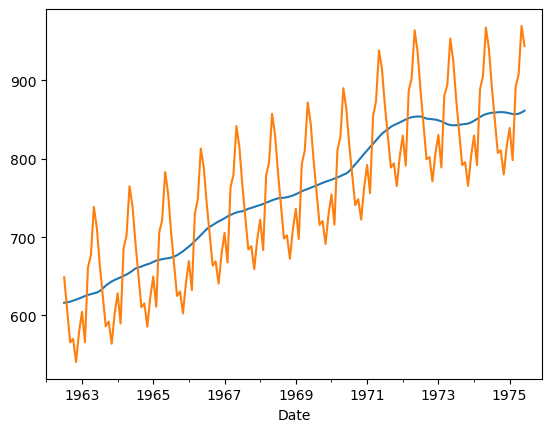

In [7]:
trend.plot()
(seasonal + trend).plot()

## Time serie operations in Pandas

In [8]:
# Resample
df_yearly = df['Production'].resample('Y').mean()
df_yearly.head(5)

Date
1962-12-31    615.750000
1963-12-31    630.000000
1964-12-31    658.750000
1965-12-31    673.083333
1966-12-31    708.750000
Freq: A-DEC, Name: Production, dtype: float64

<Axes: xlabel='Date'>

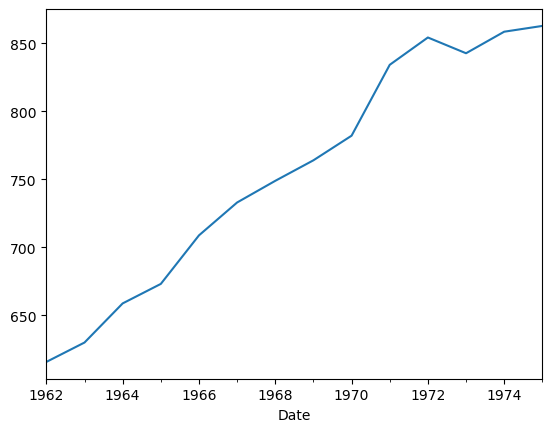

In [9]:
df_yearly.plot()

<Axes: xlabel='Date'>

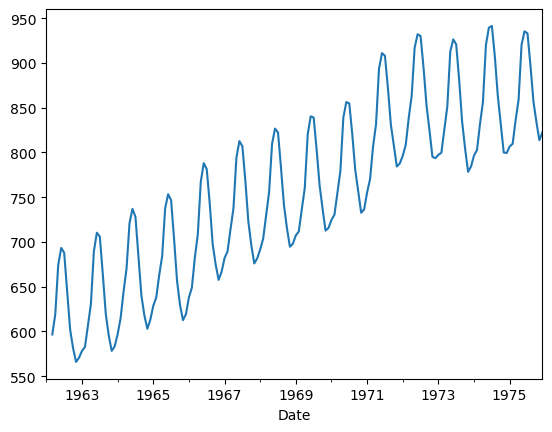

In [10]:
# Rolling average
df_rolling = df['Production'].rolling(window=3).mean()
df_rolling.plot()

<Axes: xlabel='Date'>

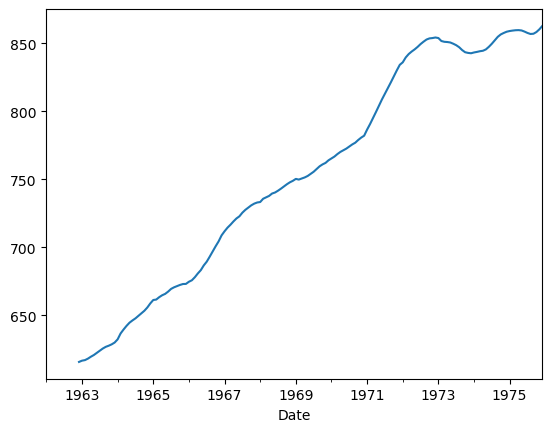

In [11]:
df_rolling = df['Production'].rolling(window=12).mean()
df_rolling.plot()

In [12]:
# Shifting
df['shifted_1'] = df['Production'].shift(1)
df['shifted_m1'] = df['Production'].shift(-1)
df.head(10)

,Production,shifted_1,shifted_m1
Date,,,
1962-01-01,589,NaN,561.0
1962-02-01,561,589.0,640.0
1962-03-01,640,561.0,656.0
1962-04-01,656,640.0,727.0
1962-05-01,727,656.0,697.0
1962-06-01,697,727.0,640.0
1962-07-01,640,697.0,599.0
1962-08-01,599,640.0,568.0
1962-09-01,568,599.0,577.0


In [13]:
df['diff1'] = df['Production'].diff(1)
df.head(10)

,Production,shifted_1,shifted_m1,diff1
Date,,,,
1962-01-01,589,NaN,561.0,NaN
1962-02-01,561,589.0,640.0,-28.0
1962-03-01,640,561.0,656.0,79.0
1962-04-01,656,640.0,727.0,16.0
1962-05-01,727,656.0,697.0,71.0
1962-06-01,697,727.0,640.0,-30.0
1962-07-01,640,697.0,599.0,-57.0
1962-08-01,599,640.0,568.0,-41.0
1962-09-01,568,599.0,577.0,-31.0


<Axes: xlabel='Date'>

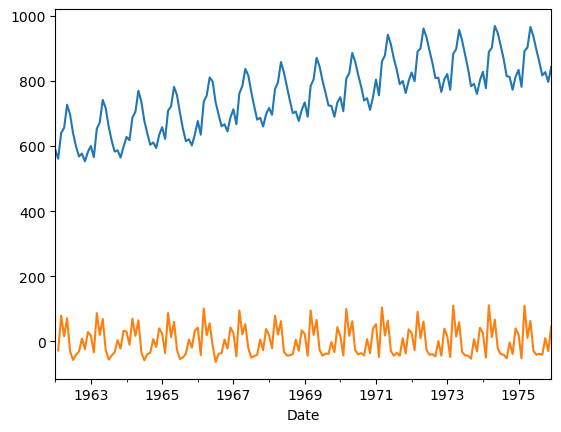

In [14]:
df['Production'].plot()
df['diff1'].plot()